<a href="https://colab.research.google.com/github/ayoub-sys/deepLearning/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
import tensorflow_datasets as tfds


**Downloadnig and preprocessing the data**

In [ ]:
BUFFER_SIZE=70_000
BATCH_SIZE=128
NUM_EPOCHS=20


In [ ]:
mnist_dataset, mnist_info=tfds.load(name="mnist", with_info=True,as_supervised=True)

In [ ]:
mnist_train, mnist_test=mnist_dataset['train'],mnist_dataset['test']


In [ ]:
def scale(image,label):
  image=tf.cast(image,tf.float32)
  image/=255.
  return image,label

In [ ]:
train_and_validation_data=mnist_train.map(scale)
test_data=mnist_test.map(scale)

In [ ]:
num_validation_samples=0.1*mnist_info.splits['train'].num_examples
num_validation_samples=tf.cast(num_validation_samples,tf.int64)

In [ ]:
num_test_samples=mnist_info.splits['test'].num_examples
num_test_samples=tf.cast(num_test_samples,tf.int64)

In [ ]:
train_and_validation_data=train_and_validation_data.shuffle(BUFFER_SIZE)


In [ ]:
train_data=train_and_validation_data.skip(num_validation_samples)
validation_data=train_and_validation_data.take(num_validation_samples)

In [ ]:
train_data=train_data.batch(BATCH_SIZE)
validation_data=validation_data.batch(num_validation_samples)
test_data=test_data.batch(num_test_samples)

**Creating the model and training it**

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(50,5,activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(50,3,activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.summary(line_length=75)

Model: "sequential"
___________________________________________________________________________
 Layer (type)                    Output Shape                  Param #     
 conv2d_2 (Conv2D)               (None, 24, 24, 50)            1300        
                                                                           
 max_pooling2d_1 (MaxPooling2D)  (None, 12, 12, 50)            0           
                                                                           
 conv2d_3 (Conv2D)               (None, 10, 10, 50)            22550       
                                                                           
 max_pooling2d_2 (MaxPooling2D)  (None, 5, 5, 50)              0           
                                                                           
 flatten (Flatten)               (None, 1250)                  0           
                                                                           
 dense (Dense)                   (None, 10)                    12510

In [17]:
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [18]:
model.compile(optimizer="adam",loss=loss_fn,metrics=['accuracy'])

In [19]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='auto',
    min_delta=0,
    patience=2,
    verbose=0,
    restore_best_weights=True
)

In [20]:
model.fit(
    train_data,
    epochs=NUM_EPOCHS,
    callbacks=[early_stopping],
    validation_data=validation_data,
    verbose=2
)

Epoch 1/20
422/422 - 46s - loss: 0.2708 - accuracy: 0.9240 - val_loss: 0.0826 - val_accuracy: 0.9743 - 46s/epoch - 109ms/step
Epoch 2/20
422/422 - 41s - loss: 0.0719 - accuracy: 0.9778 - val_loss: 0.0531 - val_accuracy: 0.9845 - 41s/epoch - 98ms/step
Epoch 3/20
422/422 - 41s - loss: 0.0530 - accuracy: 0.9835 - val_loss: 0.0440 - val_accuracy: 0.9872 - 41s/epoch - 98ms/step
Epoch 4/20
422/422 - 42s - loss: 0.0454 - accuracy: 0.9866 - val_loss: 0.0283 - val_accuracy: 0.9913 - 42s/epoch - 99ms/step
Epoch 5/20
422/422 - 48s - loss: 0.0379 - accuracy: 0.9884 - val_loss: 0.0274 - val_accuracy: 0.9910 - 48s/epoch - 114ms/step
Epoch 6/20
422/422 - 46s - loss: 0.0327 - accuracy: 0.9897 - val_loss: 0.0266 - val_accuracy: 0.9913 - 46s/epoch - 110ms/step
Epoch 7/20
422/422 - 48s - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.0229 - val_accuracy: 0.9927 - 48s/epoch - 114ms/step
Epoch 8/20
422/422 - 48s - loss: 0.0235 - accuracy: 0.9929 - val_loss: 0.0164 - val_accuracy: 0.9962 - 48s/epoch - 114ms/

**Testing our model**

In [ ]:
# testing our model 
test_loss,test_accuracy=model.evaluate(test_data)


In [22]:
# printing the test results 
print('Test loss:{0: .4f}.Test accuracy:{1:.2f}%'.format(test_loss,test_accuracy*100.))

Test loss: 0.0280.Test accuracy:99.12%


**Plotting the images and the results**

In [23]:
import matplotlib.pyplot as plt 
import numpy as np 


In [24]:
#split the test data into 2 arrays,containing the images and the corresponding labels 
for images, labels in test_data.take(1):
  images_test=images.numpy()
  labels_test=labels.numpy()

# Reshape the images into 28*28 form, suitable for matplotlib (original dimension: 28*28*1)
images_plot=np.reshape(images_test,(10000,28,28))

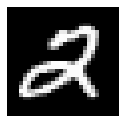

Label: 2


In [25]:
#the image to be displayed and tested 
i=1

#plot the image 
plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(images_plot[i-1],cmap="gray",aspect="auto")
plt.show()

#print the correct label for the image 

print("Label: {}".format(labels_test[i-1]))

1/1 [==============================] - 0s 38ms/step


<BarContainer object of 10 artists>

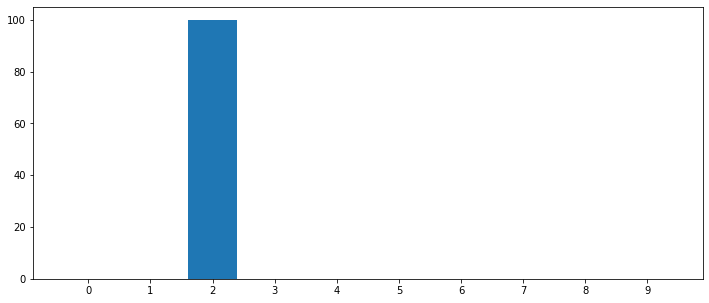

In [27]:
# obtain the model prediction (logits)
predictions=model.predict(images_test[i-1:i])

#convert those predictions into probabilities ( recall that  we incorporated the softmax activation )
probabilities=tf.nn.softmax(predictions).numpy()

#convert the probability into  percentages 
probabilities=probabilities*100

#create a bar  chart to plot the probabiltiy for each class 
plt.figure(figsize=(12,5))
plt.bar(x=[1,2,3,4,5,6,7,8,9,10],height=probabilities[0],tick_label=["0","1","2","3","4","5","6","7","8","9"])